<a href="https://colab.research.google.com/github/gmauricio-toledo/numerical-methods/blob/master/EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def f(x):
    return -0.5*x**4+4*x**3-10*x**2+8.5*x+1

def df(x):
    return -2*x**3+12*x**2-20*x+8.5

def graficar(f,a,b,show_xaxis=False):
    xs = np.linspace(a,b,num=100)
    ys = [f(x) for x in xs]
    plt.figure(dpi=100)
    plt.plot(xs,ys)
    if show_xaxis:
        plt.axhline(color='black')
    plt.show()

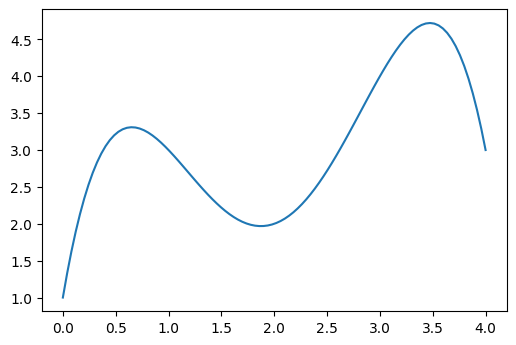

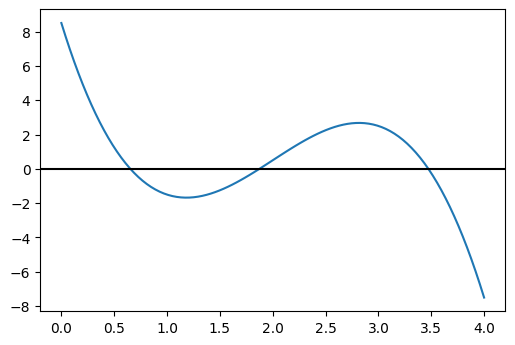

In [14]:
graficar(f,0,4)
graficar(df,0,4,show_xaxis=True)

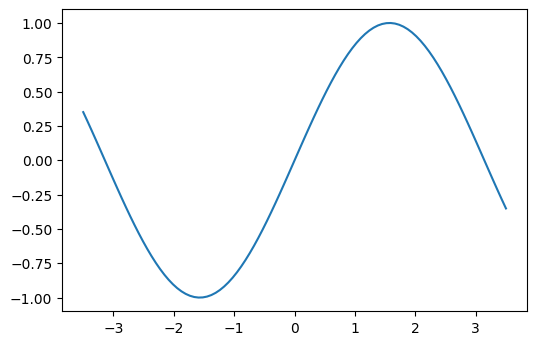

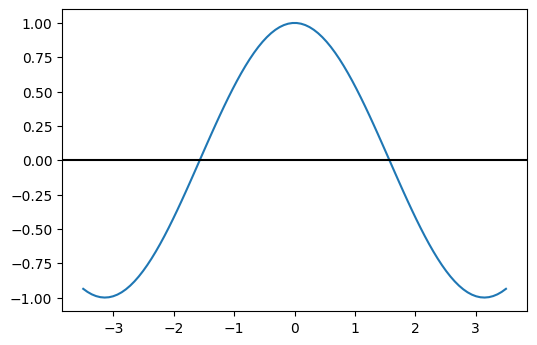

In [15]:
from math import sin,cos

graficar(sin,-3.5,3.5)
graficar(cos,-3.5,3.5,show_xaxis=True)